In [74]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

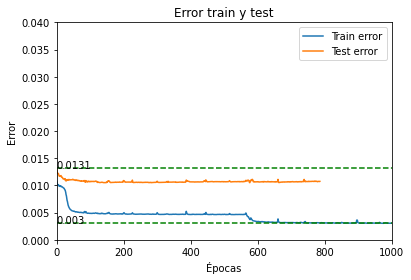

In [90]:
def plot_train_and_test_error(train_error_txt, test_error_txt):
    train_error = [float(line) for line in open(train_error_txt).readlines()]
    test_error = [float(line) for line in open(test_error_txt).readlines()]
    
    max_error = max(train_error + test_error)
    min_error = min(train_error + test_error)

    fig, ax = plt.subplots()
    ax.plot(train_error, label="Train error")
    ax.plot(test_error, label="Test error")
    ax.legend()
    ax.set_title("Error train y test")
    ax.set_xlabel("Épocas")
    ax.set_ylabel("Error")
    plt.hlines(max_error,0,1000,color="green", linestyle='--')
    plt.text(0, max_error, round(max_error, 4))
    plt.hlines(min_error,0,1000,color="green", label='min error', linestyle='--')
    plt.text(0, min_error, round(min_error, 4))
    plt.xlim(0, 1000), plt.ylim(0, 0.04)
    plt.show()

plot_train_and_test_error("models/doberman_256_arch1/train_loss.txt", "models/doberman_256_arch1/test_loss.txt")